In [16]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 25 11:07:16 2019

@author: mt
"""

import numpy as np
import matplotlib.pyplot as plt



In [17]:
X = 2 * np.random.rand(100,1)
theta0 = 4
theta1 = 3
y = (theta0 + theta1 * X) +np.random.randn(100,1)


In [18]:

#plt.axes().set_aspect('equal', 'box')

def h(X,theta):
    return np.dot(X,theta)

m = y.shape[0]
def Cost(theta,X,y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)

def analytical_solution(X_input, y):
    val1 = np.linalg.inv(np.dot(np.transpose(X_input),X_input))
    val2 = np.dot(np.transpose(X_input),y)
    theta = np.dot(val1,val2)
    return theta


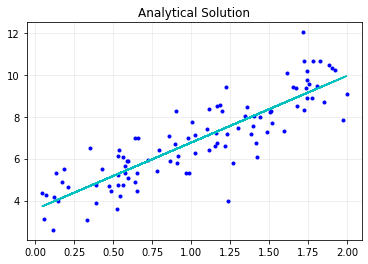

In [19]:

X = np.insert(X, 0, 1, axis=1)
theta_analytical = analytical_solution(X,y)
y_analytical = np.array([theta_analytical[0]*X[:,0] + theta_analytical[1]*X[:,1]]).T

score_predicted = 1-((y-y_analytical)**2).sum()/((y-y.mean())**2).sum()

fig1 = plt.figure()
ax = plt.axes()
plt.title('Analytical Solution')
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
plt.plot(X[:,1],y_analytical,'c-')
plt.show()


In [20]:

print('theta analytical ', np.round(theta_analytical[0][0], decimals=2),',', np.round(theta_analytical[1][0], decimals=2))
print('cost ', Cost(theta_analytical,X, y)[0][0])
print('accuracy ', np.round(score_predicted*100, decimals=4))


theta analytical  3.58 , 3.19
cost  0.5163567481740682
accuracy  74.8417


In [21]:

def gradient(X,y,theta):
    grad = X.T.dot(h(X,theta)-y)
    return grad

def stocashtic_gradient_descent(X,y,theta,alpha,num_iters):
    m = len(y)
    j_iter = np.zeros(num_iters)    
    theta_iter = np.array([[],[]])
    gradient_iter = np.array([[],[]])
    #m_arr = np.arange(m)
    for j in range(num_iters):
        cost =0.0   
        #np.random.shuffle(m_arr)
        m_arr = np.random.randint(0,m,m)
        for i in m_arr:
            #rand_ind = np.random.randint(0,m)
            X_i = X[i,:].reshape(1,X.shape[1])
            y_i = y[i].reshape(1,1)
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*alpha*( X_i.T.dot((prediction - y_i)))
            #theta = theta - alpha*gradient(X_i,y_i,theta)        
            cost += Cost(theta,X_i,y_i)
        j_iter[j]  = cost
        theta_iter = np.append(theta_iter, theta, axis = 1)            
        gradient_iter = np.append(gradient_iter, gradient(X[m_arr],y[m_arr],theta), axis = 1)                           
    return theta, j_iter, np.transpose(theta_iter), np.transpose(gradient_iter)


In [ ]:
alpha = .003
n_iter = 5000

theta_initial = np.random.randn(2,1)
#theta = np.transpose(np.array([[4,3]]))

theta, j_iter, theta_iter, gradient_iter = stocashtic_gradient_descent(X,y,theta_initial,alpha,n_iter)
y_gd = np.array([theta_iter[np.argmin(j_iter)][0]*X[:,0] + theta_iter[np.argmin(j_iter)][1]*X[:,1]]).T

gradient_magnitude = np.sqrt(np.square(gradient_iter[:,0]) + np.square(gradient_iter[:,1]))
gradient_x = gradient_iter[:,0]
gradient_y = gradient_iter[:,1]




### Which iteration number give me the lowest cost?

In [26]:
print(np.argmin(j_iter))

4722


### theta values of that iteration? 

In [29]:
print('Cost: ', theta_iter[np.argmin(j_iter)][0], ', ', theta_iter[np.argmin(j_iter)][1])

Cost:  3.631031029525822 ,  3.1481078465189225


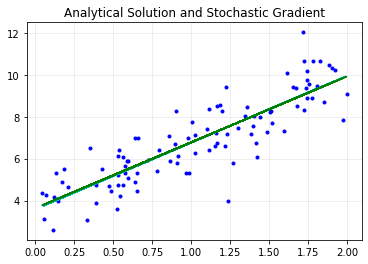

In [22]:

fig2 = plt.figure()
ax = plt.axes()
plt.title('Analytical Solution and Stochastic Gradient')
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
plt.plot(X[:,1],y_analytical,'c--')
plt.plot(X[:,1],y_gd,'g-')
plt.show()


In [23]:
def minibatch_gradient_descent(X,y,theta,alpha,n_iter,batch_size):    
    m = len(y)
    J_iter = np.zeros(n_iter)    #n_batches = int(m/batch_size)
    theta_iter = np.array([[],[]])
    gradient_iter = np.array([[],[]])
    for j in range(n_iter):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]            
            X_i = np.c_[np.ones(len(X_i)),X_i]           
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*alpha*( X_i.T.dot((prediction - y_i)))
            cost += Cost(theta,X_i,y_i)
        J_iter[j]  = cost
        theta_iter = np.append(theta_iter, theta, axis = 1)            
        gradient_iter = np.append(gradient_iter, gradient(X,y,theta)/len(batch_size), axis = 1)
    return (theta,J_iter, np.transpose(theta_iter), np.transpose(gradient_iter))


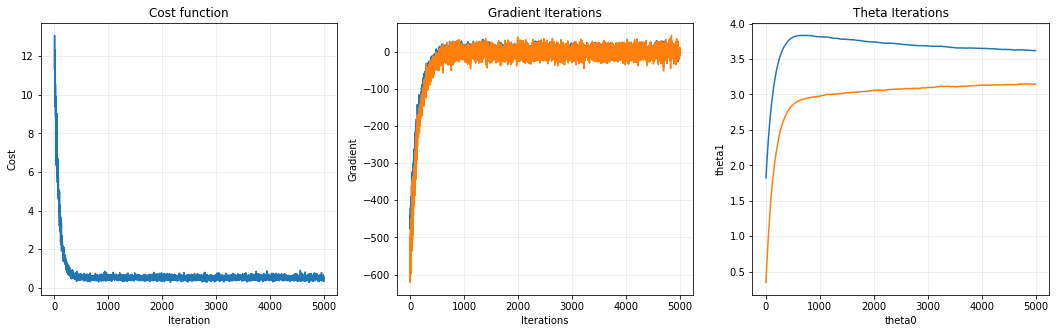

In [24]:


fig3, ax = plt.subplots(1,3)
fig3.set_figheight(5)
fig3.set_figwidth(20)
fig3.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)


plt1.grid(axis='both', alpha=.25)
plt1.plot(np.arange(n_iter), j_iter,'-')
plt1.set_xlabel('Iteration')
plt1.set_ylabel('Cost')
plt1.set_title('Cost function')

plt2.set_title('Gradient Iterations')
plt2.set_xlabel('Iterations')
plt2.set_ylabel('Gradient')
plt2.grid(axis='both', alpha=.25)
plt2.plot(np.arange(n_iter), gradient_iter[:,0])
plt2.plot(np.arange(n_iter), gradient_iter[:,1])

plt3.set_title('Theta Iterations')
plt3.set_xlabel('theta0')
plt3.set_ylabel('theta1')
plt3.grid(axis='both', alpha=.25)
plt3.plot(np.arange(n_iter), theta_iter[:,0])
plt3.plot(np.arange(n_iter), theta_iter[:,1])
plt.show()



In [25]:

print('theta ', np.round(theta_iter[np.argmin(j_iter)][0], decimals=2),',' ,np.round(theta_iter[np.argmin(j_iter)][1], decimals=2))
print('cost ', Cost(theta_iter[np.argmin(j_iter)],X, y)[0][0])
score_predicted = 1-((y-y_gd)**2).sum()/((y-y.mean())**2).sum()
print('accuracy ', np.round(score_predicted*100, decimals=4))


theta  3.63 , 3.15
cost  2.0802252453264676
accuracy  74.8254
